In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [229]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [230]:
df.shape

(10000, 14)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [232]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [233]:
df.duplicated().sum()

0

In [234]:
df['Gender'].value_counts()


,count
Gender,
Male,5457
Female,4543


In [235]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [236]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [237]:
df.shape

(10000, 12)

In [238]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Exited'])
y=df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [239]:
x_train.shape,x_test.shape

((8000, 11), (2000, 11))

In [240]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [241]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [242]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [243]:
model=Sequential()

In [244]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [245]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [246]:
 model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [247]:
history=model.fit(x_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7097 - loss: 0.5652 - val_accuracy: 0.7994 - val_loss: 0.4709
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.4576 - val_accuracy: 0.8069 - val_loss: 0.4404
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7994 - loss: 0.4474 - val_accuracy: 0.8163 - val_loss: 0.4258
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8177 - loss: 0.4177 - val_accuracy: 0.8200 - val_loss: 0.4157
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8244 - loss: 0.4132 - val_accuracy: 0.8238 - val_loss: 0.4093
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8409 - loss: 0.3849 - val_accuracy: 0.8250 - val_loss: 0.4019
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8268 - loss: 0.4074 - val_accuracy: 0.8325 - val_loss: 0.3943
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8370 - loss: 0.3795 - val_accu

In [248]:
model.layers[0].get_weights()

[array([[ 0.17158301, -0.30937228,  0.2651501 , -0.0960634 , -0.18358384,
         -0.02407856,  0.11357443, -0.06653484, -0.11961074, -0.06540004,
         -0.17165457],
        [ 0.13743454, -0.20674956, -0.36772135, -0.06279994, -0.03688739,
         -0.6173244 , -0.06895332, -0.42655674,  0.31090468,  0.5654372 ,
          1.2109654 ],
        [ 0.1898601 , -0.1633451 , -0.28377908,  0.12761803,  0.03674912,
          0.08932218,  0.28043577, -0.24859412, -0.00944985, -0.04826732,
          0.06004397],
        [ 0.7841343 ,  0.4642428 , -0.64816195,  0.36052144,  0.3240167 ,
          0.07074649, -0.1587017 ,  0.04415876,  0.40645233, -0.18639383,
         -0.01381564],
        [ 0.07534548, -0.50953853,  0.09163553, -0.9896471 ,  0.01898369,
          0.32141256, -0.20879538,  1.0054464 ,  1.272111  , -1.07168   ,
         -0.01674019],
        [ 0.12637897, -0.20847043, -0.24970643, -0.16366513,  0.25666317,
          0.10692175,  0.00910186, -0.375998  , -0.00903244,  0.1131294

In [249]:
model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.04553458],
       [0.01721031],
       [0.15456228],
       ...,
       [0.83384085],
       [0.07514706],
       [0.20374341]], dtype=float32)

In [250]:
y_pred=np.where(model.predict(x_test_scaled)>0.5,1,0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [251]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

85.75

In [252]:
history.history

{'accuracy': [0.7579687237739563,
  0.7985937595367432,
  0.8037499785423279,
  0.8125,
  0.8217187523841858,
  0.8248437643051147,
  0.8299999833106995,
  0.8360937237739563,
  0.8431249856948853,
  0.846875011920929,
  0.8506249785423279,
  0.8535937666893005,
  0.8567187786102295,
  0.8567187786102295,
  0.8582812547683716,
  0.8595312237739563,
  0.8607812523841858,
  0.8589062690734863,
  0.8579687476158142,
  0.8609374761581421,
  0.8606250286102295,
  0.8590624928474426,
  0.8600000143051147,
  0.8612499833106995,
  0.8584374785423279,
  0.8590624928474426,
  0.8598437309265137,
  0.8621875047683716,
  0.8614062666893005,
  0.8610937595367432,
  0.8623437285423279,
  0.8609374761581421,
  0.862500011920929,
  0.86328125,
  0.8623437285423279,
  0.8615624904632568,
  0.8628125190734863,
  0.8628125190734863,
  0.8612499833106995,
  0.8635937571525574,
  0.86328125,
  0.8629687428474426,
  0.8628125190734863,
  0.8621875047683716,
  0.8631250262260437,
  0.862500011920929,
  0.864

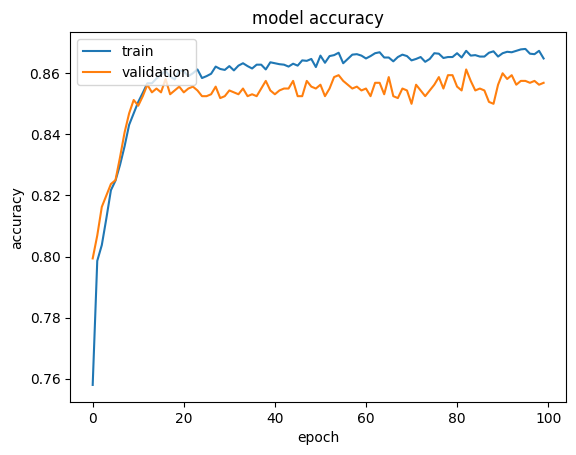

In [253]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

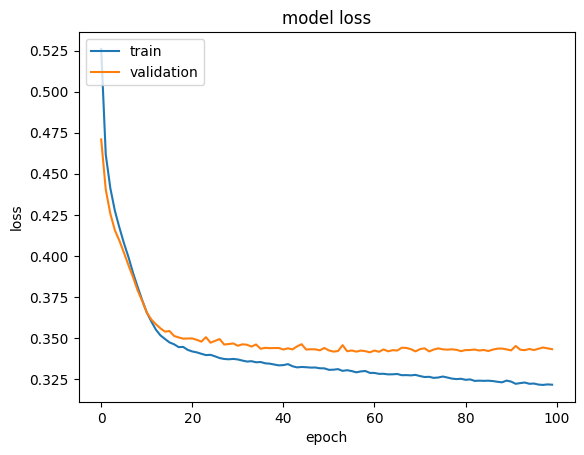

In [254]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')